<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

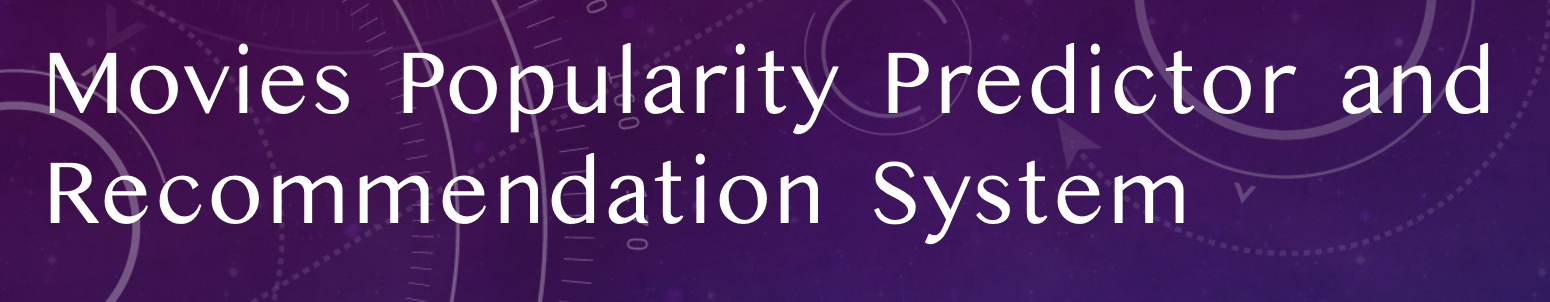

In [1]:
import gradio as gr
import torch
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import torch.nn as nn
from sentence_transformers import SentenceTransformer
import torch.nn.functional as F
import transformers
from transformers import AutoModelForSequenceClassification
from transformers import (
    AutoModel, AutoConfig, 
    AutoTokenizer, logging
)
logging.set_verbosity_error()
logging.set_verbosity_warning()

# train_text = data['AAPL']['2014-01-01'] #train['excerpt'][:16].tolist()
max_seq_length = 512
chkpoint1 = 'paraphrase-MiniLM-L6-v2'


model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Getting the embedding
def get_embedding_sent(overview):
    
    #Sentences we want to encode.
    sentence = [overview]

    #Sentences are encoded by calling model.encode()
    embedding = model.encode(sentence)
    return embedding[0].tolist()


# def get_embedding_bert(tweet_text):
    
# #     task='sentiment'
#     _pretrained_model = chkpoint1

#     config = AutoConfig.from_pretrained(_pretrained_model)
#     config.update({'output_hidden_states':True}) 
#     # config.update({'max_position_embeddings':256})
#     model_bertweet = AutoModelForSequenceClassification.from_pretrained(_pretrained_model, config=config)
#     tokenizer = AutoTokenizer.from_pretrained(_pretrained_model,use_fast=False)
    
#     features = tokenizer.batch_encode_plus(
#         [tweet_text],
#         add_special_tokens=True,
#         padding='max_length',
#         max_length=max_seq_length,
#         truncation=True,
#         return_tensors='pt',
#         return_attention_mask=True
#     )
#     outputs = model_bertweet(features['input_ids'], features['attention_mask'])
#     all_hidden_states = torch.stack(outputs['hidden_states']) #  torch.stack(outputs[2]) 
    
#     return all_hidden_states[-1][:, 0].cpu().detach().numpy()[0].tolist()

In [2]:
# pip install -U sentence-transformers

In [3]:
# pip install sentence-transformers

In [4]:
def translate(text):
    """
    Translate the text from source lang to target lang
    """
    df = pd.read_csv('Embedding_chkpoint_1.csv')
    df['Sent_Embedding'] = df['Sent_Embedding'].apply(lambda x: eval(x))
    
    temp = df.copy()
    y = get_embedding_sent(text)
    x_embed = np.array([i for i in temp['Sent_Embedding']])
    cs = cosine_similarity(x_embed,np.array(y).reshape(1,-1))
    temp['similarity'] = cs
    temp = temp.sort_values('similarity',ascending=False)
    temp = temp[['original_title','similarity','genres','popularity']].head(10)
    return temp

demo = gr.Interface(
    fn=translate,
    inputs=[
#         gr.components.Dropdown(label="Model", choices=MODELS),
        gr.components.Textbox(label="Text")
        
#         gr.components.Dropdown(label="Target Language", choices=LANGS),
    ],
    outputs= gr.Dataframe(), #["text"],
#     examples=[["Building a translation demo with Gradio is so easy!", "eng_Latn", "spa_Latn"]],
    cache_examples=False,
    title="Recommendation Demo",
#     description="This demo is a simplified version of the original [NLLB-Translator](https://huggingface.co/spaces/Narrativaai/NLLB-Translator) space"
)

demo.launch()


IMPORTANT: You are using gradio version 3.5, however version 3.14.0 is available, please upgrade.
--------
Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x1dc40d00a30>, 'http://127.0.0.1:7862/', None)